# Requêter via des API avec Python

<p class="badges">

<a href="https://github.com/linogaliana/python-datascientist/blob/master/notebooks/course/manipulation/04c_API_TP.ipynb" class="github"><i class="fab fa-github"></i></a>
<a href="https://downgit.github.io/#/home?url=https://github.com/linogaliana/python-datascientist/blob/master/notebooks/course/manipulation/04c_API_TP.ipynb" target="_blank" rel="noopener"><img src="https://img.shields.io/badge/Download-Notebook-important?logo=Jupyter" alt="Download"></a>
<a href="https://nbviewer.jupyter.org/github/linogaliana/python-datascientist/blob/master/notebooks/course/manipulation/04c_API_TP.ipynb" target="_blank" rel="noopener"><img src="https://img.shields.io/badge/Visualize-nbviewer-blue?logo=Jupyter" alt="nbviewer"></a>
<a href="https://datalab.sspcloud.fr/launcher/inseefrlab-helm-charts-datascience/jupyter?autoLaunch=true&onyxia.friendlyName=%C2%ABpython-datascience%C2%BB&init.personalInit=%C2%ABhttps%3A%2F%2Fraw.githubusercontent.com%2Flinogaliana%2Fpython-datascientist%2Fmaster%2Fsspcloud%2Finit-jupyter.sh%C2%BB&init.personalInitArgs=%C2%ABnotebooks/course/manipulation/04c_API_TP.ipynb%C2%BB&security.allowlist.enabled=false" target="_blank" rel="noopener"><img src="https://img.shields.io/badge/SSPcloud-Tester%20via%20SSP--cloud-informational&amp;color=yellow?logo=Python" alt="Onyxia"></a><br>
<a href="https://mybinder.org/v2/gh/linogaliana/python-datascientist/master?filepath={binder_path}" target="_blank" rel="noopener"><img src="https://img.shields.io/badge/Launch-Binder-E66581.svg?logo=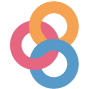" alt="Binder"></a>
<a href="http://colab.research.google.com/github/linogaliana/python-datascientist/blob/master/notebooks/course/manipulation/04c_API_TP.ipynb" target="_blank" rel="noopener"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"></a>
<a href="https://github.dev/linogaliana/python-datascientist/notebooks/course/manipulation/04c_API_TP.ipynb" target="_blank" rel="noopener"><img src="https://img.shields.io/static/v1?logo=visualstudiocode&label=&message=Open%20in%20Visual%20Studio%20Code&labelColor=2c2c32&color=007acc&logoColor=007acc" alt="githubdev"></a>

</p>

</p>

# Introduction : Qu’est-ce qu’une API ?

## Définition

Pour expliquer le principe d’une API, je vais reprendre le début de
la fiche dédiée dans la documentation collaborative
[utilitR](https://www.book.utilitr.org/api.html) que je recommande de lire :

> Une *Application Programming Interface* (ou API) est une interface de programmation qui permet d’utiliser une application existante pour restituer des données. Le terme d’API peut être paraître intimidant, mais il s’agit simplement d’une façon de mettre à disposition des données : plutôt que de laisser l’utilisateur consulter directement des bases de données (souvent volumineuses et complexes), l’API lui propose de formuler une requête qui est traitée par le serveur hébergeant la base de données, puis de recevoir des données en réponse à sa requête.
>
> D’un point de vue informatique, une API est une porte d’entrée clairement identifiée par laquelle un logiciel offre des services à d’autres logiciels (ou utilisateurs). L’objectif d’une API est de fournir un point d’accès à une fonctionnalité qui soit facile à utiliser et qui masque les détails de la mise en oeuvre. Par exemple, l’API Sirene permet de récupérer la raison sociale d’une entreprise à partir de son identifiant Siren en interrogeant le référentiel disponible sur Internet directement depuis un script R, sans avoir à connaître tous les détails du répertoire Sirene.
>
> À l’Insee comme ailleurs, la connexion entre les bases de données pour les nouveaux projets tend à se réaliser par des API. L’accès à des données par des API devient ainsi de plus en plus commun et est amené à devenir une compétence de base de tout utilisateur de données.
>
> [`utilitR`](https://www.book.utilitr.org/api.html)

## Avantages des API

A nouveau, citons la documentation [utilitR](https://www.book.utilitr.org/api.html)

Les API présentent de multiples avantages :

> -   Les API rendent les programmes plus reproductibles. En effet, grâce aux API, il est possible de mettre à jour facilement les données utilisées par un programme si celles-ci évoluent. Cette flexibilité accrue pour l’utilisateur évite au producteur de données d’avoir à réaliser de multiples extractions, et réduit le problème de la coexistence de versions différentes des données.
> -   Grâce aux API, l’utilisateur peut extraire facilement une petite partie d’une base de données plus conséquente.
> -   Les API permettent de mettre à disposition des données tout en limitant le nombre de personnes ayant accès aux bases de données elles-mêmes.
> -   Grâce aux API, il est possible de proposer des services sur mesure pour les utilisateurs (par exemple, un accès spécifique pour les gros utilisateurs).
>
> [`utilitR`](https://www.book.utilitr.org/api.html)

L’utilisation accrue d’API dans le cadre de stratégies open-data est l’un
des piliers des 15 feuilles de route ministérielles
en matière d’ouverture, de circulation et de valorisation des données publiques.

## Utilisation des API

Citons encore une fois
la documentation [`utilitR`](https://www.book.utilitr.org/api.html)

> Une API peut souvent être utilisée de deux façons : par une interface Web, et par l’intermédiaire d’un logiciel (R, Python…). Par ailleurs, les API peuvent être proposées avec un niveau de liberté variable pour l’utilisateur :
>
> -   soit en libre accès (l’utilisation n’est pas contrôlée et l’utilisateur peut utiliser le service comme bon lui semble) ;
> -   soit via la génération d’un compte et d’un jeton d’accès qui permettent de sécuriser l’utilisation de l’API et de limiter le nombre de requêtes.
>
> [`utilitR`](https://www.book.utilitr.org/api.html)

De nombreuses API nécessitent une authentification, c’est-à-dire un
compte utilisateur afin de pouvoir accéder aux données.
Dans un premier temps,
nous regarderons exclusivement les API ouvertes sans restriction d’accès.  
Certains exercices et exemples permettront néanmoins d’essayer des API
avec restrictions d’accès.

# Requêter une API

## Principe général

> L’utilisation de l’interface Web est utile dans une démarche exploratoire mais trouve rapidement ses limites, notamment lorsqu’on consulte régulièrement l’API. L’utilisateur va rapidement se rendre compte qu’il est beaucoup plus commode d’utiliser une API via un logiciel de traitement pour automatiser la consultation ou pour réaliser du téléchargement de masse. De plus, l’interface Web n’existe pas systématiquement pour toutes les API.
>
> Le mode principal de consultation d’une API consiste à adresser une requête à cette API via un logiciel adapté (R, Python, Java…). Comme pour l’utilisation d’une fonction, l’appel d’une API comprend des paramètres qui sont détaillées dans la documentation de l’API.
>
> [`utilitR`](https://www.book.utilitr.org/api.html)

Voici les éléments importants à avoir en tête sur les requêtes (j’emprunte encore
à [`utilitR`](https://www.book.utilitr.org/api.html)):

-   Le **point d’entrée** d’un service offert par une API se présente sous la forme d’une URL (adresse web).
    Chaque service proposé par une API a sa propre URL. Par exemple, dans le cas de l’OpenFood Facts,
    l’URL à utiliser pour obtenir des informations sur un produit particulier (l’identifiant `737628064502`)
    est https://world.openfoodfacts.org/api/v0/product/737628064502.json
-   Cette URL doit être complétée avec différents paramètres qui précisent la requête (par exemple l’identifiant Siren). Ces paramètres viennent s’ajouter à l’URL, souvent à la suite de `?`. Chaque service proposé par une API a ses propres paramètres, détaillés dans la documentation.
-   Lorsque l’utilisateur soumet sa requête, l’API lui renvoie une réponse structurée contenant l’ensemble des informations demandées. Le résultat envoyé par une API est majoritairement aux formats JSON ou XML (deux formats dans lesquels les informations sont hiérarchisées de manière emboitée). Plus rarement, certains services proposent une information sous forme plate (de type csv).

Du fait de la dimension hiérarchique des formats JSON ou XML, le résultat n’est pas toujours facile à récupérer mais
`python` propose d’excellents outils pour cela (meilleurs que ceux de `R`). Certains packages, notamment `json`, facilitent l’extraction de champs d’une sortie d’API. Dans certains cas, des packages spécifiques à une API ont été créés pour simplifier l’écriture d’une requête ou la récupération du résultat. Par exemple, le package
[pynsee](https://github.com/InseeFrLab/Py-Insee-Data/tree/master/pynsee)
propose des options qui seront retranscrites automatiquement dans l’URL de
requête pour faciliter le travail sur les données Insee.

## Illustration avec une API de l’Ademe pour obtenir des diagnostics energétiques

Le diagnostic de performance énergétique (DPE)
renseigne sur la performance énergétique d’un logement ou d’un bâtiment,
en évaluant sa consommation d’énergie et son impact en terme d’émissions de gaz à effet de serre.

Les données des performances énergétiques des bâtiments sont
mises à disposition par l’[Ademe](https://data.ademe.fr/datasets/dpe-france).
Comme ces données sont relativement
volumineuses, une API peut être utile lorsqu’on ne s’intéresse
qu’à un sous-champ des données.
Une documentation et un espace de test de l’API sont disponibles
sur le site [API GOUV](https://api.gouv.fr/documentation/api_dpe_logements)[1].

Supposons qu’on désire récupérer une centaine de valeurs pour la commune
de Villieu-Loyes-Mollon dans l’Ain (code Insee 01450).

L’API comporte plusieurs points d’entrée. Globalement, la racine
commune est:

> https://koumoul.com/data-fair/api/v1/datasets/dpe-france

Ensuite, en fonction de l’API désirée, on va ajouter des éléments
à cette racine. En l’occurrence, on va utiliser
l’API `field` qui permet de récupérer des lignes en fonction d’un
ou plusieurs critères (pour nous, la localisation géographique):

L’exemple donné dans la documentation technique est

> GET https://koumoul.com/data-fair/api/v1/datasets/dpe-france/values/{field}

ce qui en python se traduira par l’utilisation de la méthode `get` du
package `request`
sur un url dont la structure est la suivante:

-   il commencera par `https://koumoul.com/data-fair/api/v1/datasets/dpe-france/values/` ;
-   il sera ensuite suivi par des paramètres de recherche? Le champ `{field}`
    commande ainsi généralement par un `?` qui permet ensuite de spécifier des paramètres
    sous la forme `nom_parameter=value`

A la lecture de la documentation, les premiers paramètres qu’on désire:

-   Le nombre de pages, ce qui nous permet d’obtenir un certain nombre d’échos. On
    va seulement récupérer 10 pages ce qui correspond à une centaine d’échos. On va
    néanmoins préciser qu’on veut 100 échos
-   Le format de sortie. On va privilégier le `JSON` qui est un format standard dans le
    monde des API. `Python` offre beaucoup de flexibilité grâce à l’un de
    ses objets de base, à savoir le dictionnaire (type `dict`), pour manipuler de tels
    fichiers
-   Le code commune des données qu’on désire obtenir. Comme on l’a évoqué,
    on va récupérer les données dont le code commune est `01450`. D’après la doc,
    il convient de passer le code commune sous le format:
    `code_insee_commune_actualise:{code_commune}`. Pour éviter tout risque de
    mauvais formatage, on va utiliser `%3A%` pour signifier `:`
-   D’autres paramètres annexes, suggérés par la documentation

Cela nous donne ainsi un URL dont la structure est la suivante:

[1] La documentation est également disponible [ici](https://koumoul.com/openapi-viewer/?proxy=false&hide-toolbar=true&url=https://koumoul.com/s/data-fair/api/v1/datasets/dpe-france/api-docs.json)

In [2]:
code_commune="01450"
size = 100
api_root="https://koumoul.com/data-fair/api/v1/datasets/dpe-france/lines"
url_api = f"{api_root}?page=1&after=10&format=json&q_mode=simple&qs=code_insee_commune_actualise" + "%3A%22" + f"{code_commune}" + "%22" + f"&size={size}&select=" + "%2A&sampling=neighbors"

Si vous introduisez cet URL dans votre navigateur, vous devriez aboutir
sur un `JSON` non formaté<a name="cite_ref-1"></a>[<sup>\[1\]</sup>](#cite_note-1). En `Python`,
on peut utiliser `requests` pour récupérer les données`{=html} <a name="cite_note-2"></a>2. [^](#cite_ref-2)`

Le JSON est un format très apprécié dans le domaine du *big data*
car il permet de stocker de manière intelligente des données
de structures diverses. Il
s’agit d’un des formats privilégiés du paradigme No-SQL pour lequel
cet [excellent cours](http://b3d.bdpedia.fr/) propose plus de détails

Suivant les API, nous avons soit besoin de rien de plus si nous parvenons directement à obtenir un json, soit devoir utiliser un *parser* comme `BeautifulSoup` dans le cas contraire. Ici, le JSON peut être formaté relativement aisément.

In [3]:
import requests
import pandas as pd

req = requests.get(url_api)
wb = req.json()

Prenons par exemple les 1000 premiers caractères du résultat, pour se donner
une idée du résultat et se convaincre que notre filtre au niveau
communal est bien passé :

``` python
print(req.content[:1000])
```

b’{“total”: 114,“next”: “https://koumoul.com/data-fair/api/v1/datasets/dpe-france/lines?after=102721&format=json&q_mode=simple&qs=code_insee_commune_actualise%3A%2201450%22&size=100&select=\*&sampling=neighbors”,“results”: \[\n {“classe_consommation_energie”: “D”,“tr001_modele_dpe_type_libelle”: “Vente”,“annee_construction”: 1947,“\_geopoint”: “45.927577,5.229832”,“latitude”: 45.927577,“surface_thermique_lot”: 117.16,“\_i”: 487,“tr002_type_batiment_description”: “Maison Individuelle”,“geo_adresse”: “Rue de la Bombardi8re 01800 Villieu-Loyes-Mollon”,“\_rand”: 23215,“code_insee_commune_actualise”: “01450”,“estimation_ges”: 53,“geo_score”: 0.56,“classe_estimation_ges”: “E”,“nom_methode_dpe”: “M9thode Facture”,“tv016_departement_code”: “01”,“consommation_energie”: 178,“date_etablissement_dpe”: “2013-06-13”,“longitude”: 5.229832,“\_score”: null,’

Ici, il n’est même pas nécessaire en première approche
d’utiliser le package `json`, l’information
étant déjà tabulée dans l’écho renvoyé (on a la même information pour tous les pays):
On peut donc se contenter de `pandas` pour transformer nos données en
`DataFrame` et `geopandas` pour convertir en données
géographiques :

In [5]:
import pandas as pandas
import geopandas as gpd

def get_dpe_from_url(url):

    req = requests.get(url)
    wb = req.json()
    df = pd.json_normalize(wb["results"])

    dpe = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude), crs = 4326)
    dpe = dpe.dropna(subset = ['longitude', 'latitude'])

    return dpe

dpe = get_dpe_from_url(url_api)
dpe.head(2)

,classe_consommation_energie,tr001_modele_dpe_type_libelle,annee_construction,_geopoint,latitude,surface_thermique_lot,_i,tr002_type_batiment_description,geo_adresse,_rand,...,classe_estimation_ges,nom_methode_dpe,tv016_departement_code,consommation_energie,date_etablissement_dpe,longitude,_score,_id,version_methode_dpe,geometry
0,D,Vente,1947,"45.927577,5.229832",45.927577,117.16,487,Maison Individuelle,Rue de la Bombardière 01800 Villieu-Loyes-Mollon,23215,...,E,Méthode Facture,01,178.00,2013-06-13,5.229832,None,LcjWbXgBPUBpe-3dAXo_,NaN,POINT (5.22983 45.92758)
2,D,Neuf,2006,"45.923244,5.223916",45.923244,90.53,689,Maison Individuelle,Chemin du Pont-vieux 01800 Villieu-Loyes-Mollon,401672,...,C,FACTURE - DPE,01,227.99,2013-06-11,5.223916,None,ocjWbXgBPUBpe-3dA3vm,V2012,POINT (5.22392 45.92324)


Essayons de représenter sur une carte ces DPE avec les
années de construction des logements.
Avec `folium`, on obtient la carte interactive suivante:

In [6]:
import seaborn as sns
import folium

palette = sns.color_palette("coolwarm", 8)

def interactive_map_dpe(dpe):

    # convert in number
    dpe['color'] = [ord(dpe.iloc[i]['classe_consommation_energie'].lower()) - 96 for i in range(len(dpe))]
    dpe = dpe.loc[dpe['color']<=7]
    dpe['color'] = [palette.as_hex()[x] for x in dpe['color']]


    center = dpe[['latitude', 'longitude']].mean().values.tolist()
    sw = dpe[['latitude', 'longitude']].min().values.tolist()
    ne = dpe[['latitude', 'longitude']].max().values.tolist()

    m = folium.Map(location = center, tiles='Stamen Toner')

    # I can add marker one by one on the map
    for i in range(0,len(dpe)):
        folium.Marker([dpe.iloc[i]['latitude'], dpe.iloc[i]['longitude']],
                    popup=f"Année de construction: {dpe.iloc[i]['annee_construction']}, <br>DPE: {dpe.iloc[i]['classe_consommation_energie']}",
                    icon=folium.Icon(color="black", icon="home", icon_color = dpe.iloc[i]['color'])).add_to(m)

    m.fit_bounds([sw, ne])

    return m

m = interactive_map_dpe(dpe)

/miniconda/envs/python-ENSAE/lib/python3.9/site-packages/geopandas/geodataframe.py:1472: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


{{< rawhtml >}}

Make this Notebook Trusted to load map: File -> Trust Notebook <iframe srcdoc="<!DOCTYPE html>
<head> 
 <meta http-equiv="content-type" content="text/html; charset=UTF-8" />
 
 <script>
 L_NO_TOUCH = false;
 L_DISABLE_3D = false;
 </script>
 
 <style>html, body {width: 100%;height: 100%;margin: 0;padding: 0;}</style>
 <style>#map {position:absolute;top:0;bottom:0;right:0;left:0;}</style>
 <script src="https://cdn.jsdelivr.net/npm/leaflet@1.6.0/dist/leaflet.js"></script>
 <script src="https://code.jquery.com/jquery-1.12.4.min.js"></script>
 <script src="https://maxcdn.bootstrapcdn.com/bootstrap/3.2.0/js/bootstrap.min.js"></script>
 <script src="https://cdnjs.cloudflare.com/ajax/libs/Leaflet.awesome-markers/2.0.2/leaflet.awesome-markers.js"></script>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/leaflet@1.6.0/dist/leaflet.css"/>
 <link rel="stylesheet" href="https://maxcdn.bootstrapcdn.com/bootstrap/3.2.0/css/bootstrap.min.css"/>
 <link rel="stylesheet" href="https://maxcdn.bootstrapcdn.com/bootstrap/3.2.0/css/bootstrap-theme.min.css"/>
 <link rel="stylesheet" href="https://maxcdn.bootstrapcdn.com/font-awesome/4.6.3/css/font-awesome.min.css"/>
 <link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/Leaflet.awesome-markers/2.0.2/leaflet.awesome-markers.css"/>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/gh/python-visualization/folium/folium/templates/leaflet.awesome.rotate.min.css"/>
 
 <meta name="viewport" content="width=device-width,
 initial-scale=1.0, maximum-scale=1.0, user-scalable=no" />
 <style>
 #map_5ae5ba8ee2bb2858c80a7556d12877a2 {
 position: relative;
 width: 100.0%;
 height: 100.0%;
 left: 0.0%;
 top: 0.0%;
 }
 </style>
 
</head>
<body> 
 
 <div class="folium-map" id="map_5ae5ba8ee2bb2858c80a7556d12877a2" ></div>
 
</body>
<script> 
 
 var map_5ae5ba8ee2bb2858c80a7556d12877a2 = L.map(
 "map_5ae5ba8ee2bb2858c80a7556d12877a2",
 {
 center: [45.966858573404245, 5.191170306382981],
 crs: L.CRS.EPSG3857,
 zoom: 10,
 zoomControl: true,
 preferCanvas: false,
 }
 );

 

 
 
 var tile_layer_7648689406be85f6658860d8b2afbb84 = L.tileLayer(
 "https://stamen-tiles-{s}.a.ssl.fastly.net/toner/{z}/{x}/{y}.png",
 {"attribution": "Map tiles by \u003ca href=\"http://stamen.com\"\u003eStamen Design\u003c/a\u003e, under \u003ca href=\"http://creativecommons.org/licenses/by/3.0\"\u003eCC BY 3.0\u003c/a\u003e. Data by \u0026copy; \u003ca href=\"http://openstreetmap.org\"\u003eOpenStreetMap\u003c/a\u003e, under \u003ca href=\"http://www.openstreetmap.org/copyright\"\u003eODbL\u003c/a\u003e.", "detectRetina": false, "maxNativeZoom": 18, "maxZoom": 18, "minZoom": 0, "noWrap": false, "opacity": 1, "subdomains": "abc", "tms": false}
 ).addTo(map_5ae5ba8ee2bb2858c80a7556d12877a2);
 
 
 var marker_28a02380fa3e98c0f799c0a9876aa6d4 = L.marker(
 [45.927577, 5.229832],
 {}
 ).addTo(map_5ae5ba8ee2bb2858c80a7556d12877a2);
 
 
 var icon_f8d5f51bfb7e04c61127f89728c45c30 = L.AwesomeMarkers.icon(
 {"extraClasses": "fa-rotate-0", "icon": "home", "iconColor": "#ead4c8", "markerColor": "black", "prefix": "glyphicon"}
 );
 marker_28a02380fa3e98c0f799c0a9876aa6d4.setIcon(icon_f8d5f51bfb7e04c61127f89728c45c30);
 
 
 var popup_9f2f558c1a5cdd7712039a83eb9b149f = L.popup({"maxWidth": "100%"});

 
 var html_be3c13ac197a711acfef6766cbab9ba6 = $(`<div id="html_be3c13ac197a711acfef6766cbab9ba6" style="width: 100.0%; height: 100.0%;">Année de construction: 1947, <br>DPE: D</div>`)[0];
 popup_9f2f558c1a5cdd7712039a83eb9b149f.setContent(html_be3c13ac197a711acfef6766cbab9ba6);
 

 marker_28a02380fa3e98c0f799c0a9876aa6d4.bindPopup(popup_9f2f558c1a5cdd7712039a83eb9b149f)
 ;

 
 
 
 var marker_f02f87641ee98ad9fc1e5103fe017990 = L.marker(
 [45.923244, 5.223916],
 {}
 ).addTo(map_5ae5ba8ee2bb2858c80a7556d12877a2);
 
 
 var icon_c17bf3fa1e5042ec0fbe3a9c56fe7eb6 = L.AwesomeMarkers.icon(
 {"extraClasses": "fa-rotate-0", "icon": "home", "iconColor": "#ead4c8", "markerColor": "black", "prefix": "glyphicon"}
 );
 marker_f02f87641ee98ad9fc1e5103fe0

{{< /rawhtml >}}

On remarque un problème dans les données: un logement qui n’a
rien à voir avec les autres. Il faudrait donc idéalement
nettoyer un peu le jeu de données pour filtrer en fonction de
limites géographiques.

Un des paramètres qui peut permettre ceci est `geo_distance`.
Pour commencer, on va tricher un petit peu pour déterminer
les longitudes et latitudes de départ. Idéalement, on
récupérerait le découpage de la commune et utiliserait, par
exemple, le centroid de cette commune. Cela nécessite
néanmoins l’appel à une autre API que nous n’avons
pour le moment pas décrite. Nous allons donc
nous contenter d’utiliser les longitudes et latitudes
du point médian et fixer un rayon de plusieurs kilomètres
pour exclure les points aberrants.

In [8]:
x_median = dpe['longitude'].median()
y_median = dpe['latitude'].median()

La documentation nous informe du format à utiliser:

> Le format est ‘lon,lat,distance’. La distance optionnelle (0 par défaut) et est exprimée en mètres.

In [9]:
param_distance = f'{x_median},{y_median},1000'
print(param_distance)

5.224684,45.92088,1000

Notre requête devient ainsi:

In [10]:
url_api = f"{api_root}?page=1&after=10&format=json&q_mode=simple&qs=code_insee_commune_actualise" + "%3A%22" + f"{code_commune}" + "%22" + f"&size={size}&select=" + "%2A&sampling=neighbors" + f"&geodistance={param_distance}"
print(url_api)

https://koumoul.com/data-fair/api/v1/datasets/dpe-france/lines?page=1&after=10&format=json&q_mode=simple&qs=code_insee_commune_actualise%3A%2201450%22&size=100&select=%2A&sampling=neighbors&geodistance=5.224684,45.92088,1000

In [11]:
dpe_geo_filter = get_dpe_from_url(url_api)
m_geo_filter = interactive_map_dpe(dpe)

/miniconda/envs/python-ENSAE/lib/python3.9/site-packages/geopandas/geodataframe.py:1472: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


{{< rawhtml >}}

Make this Notebook Trusted to load map: File -> Trust Notebook <iframe srcdoc="<!DOCTYPE html>
<head> 
 <meta http-equiv="content-type" content="text/html; charset=UTF-8" />
 
 <script>
 L_NO_TOUCH = false;
 L_DISABLE_3D = false;
 </script>
 
 <style>html, body {width: 100%;height: 100%;margin: 0;padding: 0;}</style>
 <style>#map {position:absolute;top:0;bottom:0;right:0;left:0;}</style>
 <script src="https://cdn.jsdelivr.net/npm/leaflet@1.6.0/dist/leaflet.js"></script>
 <script src="https://code.jquery.com/jquery-1.12.4.min.js"></script>
 <script src="https://maxcdn.bootstrapcdn.com/bootstrap/3.2.0/js/bootstrap.min.js"></script>
 <script src="https://cdnjs.cloudflare.com/ajax/libs/Leaflet.awesome-markers/2.0.2/leaflet.awesome-markers.js"></script>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/leaflet@1.6.0/dist/leaflet.css"/>
 <link rel="stylesheet" href="https://maxcdn.bootstrapcdn.com/bootstrap/3.2.0/css/bootstrap.min.css"/>
 <link rel="stylesheet" href="https://maxcdn.bootstrapcdn.com/bootstrap/3.2.0/css/bootstrap-theme.min.css"/>
 <link rel="stylesheet" href="https://maxcdn.bootstrapcdn.com/font-awesome/4.6.3/css/font-awesome.min.css"/>
 <link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/Leaflet.awesome-markers/2.0.2/leaflet.awesome-markers.css"/>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/gh/python-visualization/folium/folium/templates/leaflet.awesome.rotate.min.css"/>
 
 <meta name="viewport" content="width=device-width,
 initial-scale=1.0, maximum-scale=1.0, user-scalable=no" />
 <style>
 #map_8c01bfdadf1f199040e7864bce978e72 {
 position: relative;
 width: 100.0%;
 height: 100.0%;
 left: 0.0%;
 top: 0.0%;
 }
 </style>
 
</head>
<body> 
 
 <div class="folium-map" id="map_8c01bfdadf1f199040e7864bce978e72" ></div>
 
</body>
<script> 
 
 var map_8c01bfdadf1f199040e7864bce978e72 = L.map(
 "map_8c01bfdadf1f199040e7864bce978e72",
 {
 center: [45.966858573404245, 5.191170306382981],
 crs: L.CRS.EPSG3857,
 zoom: 10,
 zoomControl: true,
 preferCanvas: false,
 }
 );

 

 
 
 var tile_layer_7ca7eeebcd3bda181a0b4c00dd0334bb = L.tileLayer(
 "https://stamen-tiles-{s}.a.ssl.fastly.net/toner/{z}/{x}/{y}.png",
 {"attribution": "Map tiles by \u003ca href=\"http://stamen.com\"\u003eStamen Design\u003c/a\u003e, under \u003ca href=\"http://creativecommons.org/licenses/by/3.0\"\u003eCC BY 3.0\u003c/a\u003e. Data by \u0026copy; \u003ca href=\"http://openstreetmap.org\"\u003eOpenStreetMap\u003c/a\u003e, under \u003ca href=\"http://www.openstreetmap.org/copyright\"\u003eODbL\u003c/a\u003e.", "detectRetina": false, "maxNativeZoom": 18, "maxZoom": 18, "minZoom": 0, "noWrap": false, "opacity": 1, "subdomains": "abc", "tms": false}
 ).addTo(map_8c01bfdadf1f199040e7864bce978e72);
 
 
 var marker_d52179b883e4417d481786f7917c75f2 = L.marker(
 [45.927577, 5.229832],
 {}
 ).addTo(map_8c01bfdadf1f199040e7864bce978e72);
 
 
 var icon_053d2e954773efa085a748169058eb41 = L.AwesomeMarkers.icon(
 {"extraClasses": "fa-rotate-0", "icon": "home", "iconColor": "#ead4c8", "markerColor": "black", "prefix": "glyphicon"}
 );
 marker_d52179b883e4417d481786f7917c75f2.setIcon(icon_053d2e954773efa085a748169058eb41);
 
 
 var popup_dc9b23a9727b084ff9eb75156569c348 = L.popup({"maxWidth": "100%"});

 
 var html_a9521dacd6ea803fc3ef54ef63cac2c7 = $(`<div id="html_a9521dacd6ea803fc3ef54ef63cac2c7" style="width: 100.0%; height: 100.0%;">Année de construction: 1947, <br>DPE: D</div>`)[0];
 popup_dc9b23a9727b084ff9eb75156569c348.setContent(html_a9521dacd6ea803fc3ef54ef63cac2c7);
 

 marker_d52179b883e4417d481786f7917c75f2.bindPopup(popup_dc9b23a9727b084ff9eb75156569c348)
 ;

 
 
 
 var marker_e3c2a5ac5457af1be2473f46f032eb38 = L.marker(
 [45.923244, 5.223916],
 {}
 ).addTo(map_8c01bfdadf1f199040e7864bce978e72);
 
 
 var icon_9f26f52fbbf73be0d9e835b75014cc71 = L.AwesomeMarkers.icon(
 {"extraClasses": "fa-rotate-0", "icon": "home", "iconColor": "#ead4c8", "markerColor": "black", "prefix": "glyphicon"}
 );
 marker_e3c2a5ac5457af1be2473f46f03

{{< /rawhtml >}}

## Un catalogue incomplet d’API existantes

De plus en plus de sites mettent des API à disposition des développeurs et autres curieux.

Pour en citer quelques-unes très connues :

-   Twitter <i class="fab fa-twitter"></i> : https://dev.twitter.com/rest/public
-   Facebook <i class="fab fa-facebook"></i> : https://developers.facebook.com/
-   Instagram <i class="fab fa-instagram"></i> : https://www.instagram.com/developer/
-   Spotify <i class="fab fa-spotify"></i> : https://developer.spotify.com/web-api/

Cependant, il est intéressant de ne pas se restreindre à celles-ci dont les
données ne sont pas toujours les plus intéressantes. Beaucoup
de producteurs de données, privés comme publics, mettent à disposition
leurs données sous forme d’API

-   [API gouv](https://api.gouv.fr/): beaucoup d’API officielles de l’Etat français
    et accès à de la documentation
-   Insee: https://api.insee.fr/catalogue/ et [`pynsee`](https://github.com/InseeFrLab/Py-Insee-Data/tree/master/pynsee)
-   Pole Emploi : https://www.emploi-store-dev.fr/portail-developpeur-cms/home.html
-   SNCF : https://data.sncf.com/api
-   Banque Mondiale : https://datahelpdesk.worldbank.org/knowledgebase/topics/125589

# L’API DVF : accéder à des données de transactions immobilières simplement

Le site `DVF` (demandes de valeurs foncières) permet de visualiser toutes les données relatives aux mutations à titre onéreux (ventes de maisons, appartements, garages…) réalisées durant les 5 dernières années.

Un site de visualisation est disponible sur <https://app.dvf.etalab.gouv.fr/>.

Ce site est très complet quand il s’agit de connaître le prix moyen au mètre
carré d’un quartier ou de comparer des régions entre elles.
L’API DVF permet d’aller plus loin afin de récupérer les résultats dans
un logiciel de traitement de données. Elle a été réalisée par
[Christian Quest](https://github.com/cquest) et le code
source est disponible sur Github <a href="https://github.com/cquest/dvf_as_api" class="github"><i class="fab fa-github"></i></a>.

Les critères de recherche sont les suivants :
- `code_commune` = code INSEE de la commune (ex: 94068)
- `section` = section cadastrale (ex: 94068000CQ)
- `numero_plan` = identifiant de la parcelle, (ex: 94068000CQ0110)
- `lat` + `lon` + `dist` (optionnel): pour une recherche géographique, dist est par défaut un rayon de 500m
- `code_postal`

Les filtres de sélection complémentaires :
- `nature_mutation` (Vente, etc)
- `type_local` (Maison, Appartement, Local, Dépendance)

<div class="alert alert-success" role="alert">

**Exercice 1 : Exploiter l’API DVF**

:one:
Rechercher toutes les transactions existantes dans DVF à Plogoff (code commune `29168`, en Bretagne).
Afficher les clés du JSON et en déduire le nombre de transactions répertoriées.

:two:
N’afficher que les transactions portant sur des maisons. Le résultat devrait
ressembler au DataFrame suivant:

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>code_service_ch</th>
      <th>reference_document</th>
      <th>articles_1</th>
      <th>articles_2</th>
      <th>articles_3</th>
      <th>articles_4</th>
      <th>articles_5</th>
      <th>numero_disposition</th>
      <th>date_mutation</th>
      <th>nature_mutation</th>
      <th>...</th>
      <th>identifiant_local</th>
      <th>surface_relle_bati</th>
      <th>nombre_pieces_principales</th>
      <th>nature_culture</th>
      <th>nature_culture_speciale</th>
      <th>surface_terrain</th>
      <th>lat</th>
      <th>lon</th>
      <th>geom.type</th>
      <th>geom.coordinates</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>None</td>
      <td>None</td>
      <td>None</td>
      <td>None</td>
      <td>None</td>
      <td>None</td>
      <td>None</td>
      <td>000001</td>
      <td>2015-06-25</td>
      <td>Vente</td>
      <td>...</td>
      <td>None</td>
      <td>90</td>
      <td>4</td>
      <td>S</td>
      <td>None</td>
      <td>277</td>
      <td>48.042047</td>
      <td>-4.705626</td>
      <td>Point</td>
      <td>[-4.705626, 48.042047]</td>
    </tr>
    <tr>
      <th>1</th>
      <td>None</td>
      <td>None</td>
      <td>None</td>
      <td>None</td>
      <td>None</td>
      <td>None</td>
      <td>None</td>
      <td>000001</td>
      <td>2015-09-12</td>
      <td>Vente</td>
      <td>...</td>
      <td>None</td>
      <td>90</td>
      <td>4</td>
      <td>S</td>
      <td>None</td>
      <td>615</td>
      <td>48.038356</td>
      <td>-4.709215</td>
      <td>Point</td>
      <td>[-4.709215, 48.038356]</td>
    </tr>
    <tr>
      <th>2</th>
      <td>None</td>
      <td>None</td>
      <td>None</td>
      <td>None</td>
      <td>None</td>
      <td>None</td>
      <td>None</td>
      <td>000001</td>
      <td>2015-05-23</td>
      <td>Vente</td>
      <td>...</td>
      <td>None</td>
      <td>50</td>
      <td>3</td>
      <td>S</td>
      <td>None</td>
      <td>170</td>
      <td>48.038782</td>
      <td>-4.709152</td>
      <td>Point</td>
      <td>[-4.709152, 48.038782]</td>
    </tr>
    <tr>
      <th>3</th>
      <td>None</td>
      <td>None</td>
      <td>None</td>
      <td>None</td>
      <td>None</td>
      <td>None</td>
      <td>None</td>
      <td>000001</td>
      <td>2018-09-28</td>
      <td>Vente</td>
      <td>...</td>
      <td>None</td>
      <td>67</td>
      <td>3</td>
      <td>S</td>
      <td>None</td>
      <td>610</td>
      <td>48.038467</td>
      <td>-4.708496</td>
      <td>Point</td>
      <td>[-4.708496, 48.038467]</td>
    </tr>
    <tr>
      <th>4</th>
      <td>None</td>
      <td>None</td>
      <td>None</td>
      <td>None</td>
      <td>None</td>
      <td>None</td>
      <td>None</td>
      <td>000001</td>
      <td>2016-03-19</td>
      <td>Vente</td>
      <td>...</td>
      <td>None</td>
      <td>108</td>
      <td>5</td>
      <td>S</td>
      <td>None</td>
      <td>251</td>
      <td>48.038626</td>
      <td>-4.708192</td>
      <td>Point</td>
      <td>[-4.708192, 48.038626]</td>
    </tr>
    <tr>
      <th>...</th>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
    </tr>
    <tr>
      <th>129</th>
      <td>None</td>
      <td>None</td>
      <td>None</td>
      <td>None</td>
      <td>None</td>
      <td>None</td>
      <td>None</td>
      <td>000001</td>
      <td>2019-03-22</td>
      <td>Vente</td>
      <td>...</td>
      <td>None</td>
      <td>77</td>
      <td>3</td>
      <td>S</td>
      <td>None</td>
      <td>273</td>
      <td>48.039692</td>
      <td>-4.702070</td>
      <td>Point</td>
      <td>[-4.70207, 48.039692]</td>
    </tr>
    <tr>
      <th>130</th>
      <td>None</td>
      <td>None</td>
      <td>None</td>
      <td>None</td>
      <td>None</td>
      <td>None</td>
      <td>None</td>
      <td>000001</td>
      <td>2018-09-15</td>
      <td>Vente</td>
      <td>...</td>
      <td>None</td>
      <td>70</td>
      <td>6</td>
      <td>S</td>
      <td>None</td>
      <td>672</td>
      <td>48.039420</td>
      <td>-4.699823</td>
      <td>Point</td>
      <td>[-4.699823, 48.03942]</td>
    </tr>
    <tr>
      <th>131</th>
      <td>None</td>
      <td>None</td>
      <td>None</td>
      <td>None</td>
      <td>None</td>
      <td>None</td>
      <td>None</td>
      <td>000001</td>
      <td>2018-09-26</td>
      <td>Vente</td>
      <td>...</td>
      <td>None</td>
      <td>98</td>
      <td>7</td>
      <td>S</td>
      <td>None</td>
      <td>455</td>
      <td>48.038956</td>
      <td>-4.700808</td>
      <td>Point</td>
      <td>[-4.700808, 48.038956]</td>
    </tr>
    <tr>
      <th>132</th>
      <td>None</td>
      <td>None</td>
      <td>None</td>
      <td>None</td>
      <td>None</td>
      <td>None</td>
      <td>None</td>
      <td>000001</td>
      <td>2015-07-11</td>
      <td>Vente</td>
      <td>...</td>
      <td>None</td>
      <td>48</td>
      <td>4</td>
      <td>S</td>
      <td>None</td>
      <td>625</td>
      <td>48.037184</td>
      <td>-4.700004</td>
      <td>Point</td>
      <td>[-4.700004, 48.037184]</td>
    </tr>
    <tr>
      <th>133</th>
      <td>None</td>
      <td>None</td>
      <td>None</td>
      <td>None</td>
      <td>None</td>
      <td>None</td>
      <td>None</td>
      <td>000001</td>
      <td>2015-09-01</td>
      <td>Vente</td>
      <td>...</td>
      <td>None</td>
      <td>70</td>
      <td>4</td>
      <td>S</td>
      <td>None</td>
      <td>555</td>
      <td>48.037312</td>
      <td>-4.712316</td>
      <td>Point</td>
      <td>[-4.712316, 48.037312]</td>
    </tr>
  </tbody>
</table>
<p>134 rows × 47 columns</p>
</div>

:three: Utiliser l’[API geo](https://api.gouv.fr/documentation/api-geo) pour
récupérer le découpage communal de la ville de Plogoff

    ERROR 1: PROJ: proj_create_from_database: Open of /miniconda/envs/python-ENSAE/share/proj failed

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>nom</th>
      <th>code</th>
      <th>codeDepartement</th>
      <th>codeRegion</th>
      <th>population</th>
      <th>geometry</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>Plogoff</td>
      <td>29168</td>
      <td>29</td>
      <td>53</td>
      <td>1230</td>
      <td>MULTIPOLYGON (((-4.72457 48.03243, -4.72454 48...</td>
    </tr>
  </tbody>
</table>
</div>

:four:
Représenter l’histogramme des prix de vente

N’hésitez pas à aller plus loin en jouant sur des variables de
groupes par exemple

:five:
On va faire une carte des ventes en affichant le prix de l’achat.

Supposons que le DataFrame des ventes s’appelle `ventes`. Il faut d’abord le
convertir
en objet `geopandas`.

``` python
ventes = ventes.dropna(subset = ['lat','lon'])
ventes = gpd.GeoDataFrame(ventes, geometry=gpd.points_from_xy(ventes.lon, ventes.lat))
ventes
```

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>code_service_ch</th>
      <th>reference_document</th>
      <th>articles_1</th>
      <th>articles_2</th>
      <th>articles_3</th>
      <th>articles_4</th>
      <th>articles_5</th>
      <th>numero_disposition</th>
      <th>date_mutation</th>
      <th>nature_mutation</th>
      <th>...</th>
      <th>nombre_pieces_principales</th>
      <th>nature_culture</th>
      <th>nature_culture_speciale</th>
      <th>surface_terrain</th>
      <th>lat</th>
      <th>lon</th>
      <th>geom.type</th>
      <th>geom.coordinates</th>
      <th>geom</th>
      <th>geometry</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>None</td>
      <td>None</td>
      <td>None</td>
      <td>None</td>
      <td>None</td>
      <td>None</td>
      <td>None</td>
      <td>000001</td>
      <td>2017-09-29</td>
      <td>Vente</td>
      <td>...</td>
      <td>0.0</td>
      <td>None</td>
      <td>None</td>
      <td>NaN</td>
      <td>48.037810</td>
      <td>-4.717967</td>
      <td>Point</td>
      <td>[-4.717967, 48.03781]</td>
      <td>NaN</td>
      <td>POINT (-4.71797 48.03781)</td>
    </tr>
    <tr>
      <th>1</th>
      <td>None</td>
      <td>None</td>
      <td>None</td>
      <td>None</td>
      <td>None</td>
      <td>None</td>
      <td>None</td>
      <td>000001</td>
      <td>2018-07-29</td>
      <td>Vente</td>
      <td>...</td>
      <td>0.0</td>
      <td>None</td>
      <td>None</td>
      <td>NaN</td>
      <td>48.037810</td>
      <td>-4.717967</td>
      <td>Point</td>
      <td>[-4.717967, 48.03781]</td>
      <td>NaN</td>
      <td>POINT (-4.71797 48.03781)</td>
    </tr>
    <tr>
      <th>2</th>
      <td>None</td>
      <td>None</td>
      <td>None</td>
      <td>None</td>
      <td>None</td>
      <td>None</td>
      <td>None</td>
      <td>000001</td>
      <td>2014-10-30</td>
      <td>Vente</td>
      <td>...</td>
      <td>NaN</td>
      <td>T</td>
      <td>None</td>
      <td>1240.0</td>
      <td>48.042296</td>
      <td>-4.709488</td>
      <td>Point</td>
      <td>[-4.709488, 48.042296]</td>
      <td>NaN</td>
      <td>POINT (-4.70949 48.04230)</td>
    </tr>
    <tr>
      <th>3</th>
      <td>None</td>
      <td>None</td>
      <td>None</td>
      <td>None</td>
      <td>None</td>
      <td>None</td>
      <td>None</td>
      <td>000001</td>
      <td>2014-10-30</td>
      <td>Vente</td>
      <td>...</td>
      <td>NaN</td>
      <td>T</td>
      <td>None</td>
      <td>630.0</td>
      <td>48.043125</td>
      <td>-4.706963</td>
      <td>Point</td>
      <td>[-4.706963, 48.043125]</td>
      <td>NaN</td>
      <td>POINT (-4.70696 48.04313)</td>
    </tr>
    <tr>
      <th>4</th>
      <td>None</td>
      <td>None</td>
      <td>None</td>
      <td>None</td>
      <td>None</td>
      <td>None</td>
      <td>None</td>
      <td>000001</td>
      <td>2015-06-25</td>
      <td>Vente</td>
      <td>...</td>
      <td>NaN</td>
      <td>J</td>
      <td>None</td>
      <td>78.0</td>
      <td>48.042232</td>
      <td>-4.705553</td>
      <td>Point</td>
      <td>[-4.705553, 48.042232]</td>
      <td>NaN</td>
      <td>POINT (-4.70555 48.04223)</td>
    </tr>
    <tr>
      <th>...</th>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
    </tr>
    <tr>
      <th>434</th>
      <td>None</td>
      <td>None</td>
      <td>None</td>
      <td>None</td>
      <td>None</td>
      <td>None</td>
      <td>None</td>
      <td>000001</td>
      <td>2015-09-01</td>
      <td>Vente</td>
      <td>...</td>
      <td>NaN</td>
      <td>T</td>
      <td>None</td>
      <td>1595.0</td>
      <td>48.037084</td>
      <td>-4.712427</td>
      <td>Point</td>
      <td>[-4.712427, 48.037084]</td>
      <td>NaN</td>
      <td>POINT (-4.71243 48.03708)</td>
    </tr>
    <tr>
      <th>435</th>
      <td>None</td>
      <td>None</td>
      <td>None</td>
      <td>None</td>
      <td>None</td>
      <td>None</td>
      <td>None</td>
      <td>000001</td>
      <td>2015-09-01</td>
      <td>Vente</td>
      <td>...</td>
      <td>4.0</td>
      <td>S</td>
      <td>None</td>
      <td>555.0</td>
      <td>48.037312</td>
      <td>-4.712316</td>
      <td>Point</td>
      <td>[-4.712316, 48.037312]</td>
      <td>NaN</td>
      <td>POINT (-4.71232 48.03731)</td>
    </tr>
    <tr>
      <th>436</th>
      <td>None</td>
      <td>None</td>
      <td>None</td>
      <td>None</td>
      <td>None</td>
      <td>None</td>
      <td>None</td>
      <td>000001</td>
      <td>2015-09-01</td>
      <td>Vente</td>
      <td>...</td>
      <td>0.0</td>
      <td>S</td>
      <td>None</td>
      <td>555.0</td>
      <td>48.037312</td>
      <td>-4.712316</td>
      <td>Point</td>
      <td>[-4.712316, 48.037312]</td>
      <td>NaN</td>
      <td>POINT (-4.71232 48.03731)</td>
    </tr>
    <tr>
      <th>437</th>
      <td>None</td>
      <td>None</td>
      <td>None</td>
      <td>None</td>
      <td>None</td>
      <td>None</td>
      <td>None</td>
      <td>000001</td>
      <td>2015-09-01</td>
      <td>Vente</td>
      <td>...</td>
      <td>NaN</td>
      <td>T</td>
      <td>None</td>
      <td>595.0</td>
      <td>48.037271</td>
      <td>-4.711856</td>
      <td>Point</td>
      <td>[-4.711856, 48.037271]</td>
      <td>NaN</td>
      <td>POINT (-4.71186 48.03727)</td>
    </tr>
    <tr>
      <th>438</th>
      <td>None</td>
      <td>None</td>
      <td>None</td>
      <td>None</td>
      <td>None</td>
      <td>None</td>
      <td>None</td>
      <td>000001</td>
      <td>2014-10-30</td>
      <td>Vente</td>
      <td>...</td>
      <td>NaN</td>
      <td>L</td>
      <td>None</td>
      <td>850.0</td>
      <td>48.033956</td>
      <td>-4.716009</td>
      <td>Point</td>
      <td>[-4.716009, 48.033956]</td>
      <td>NaN</td>
      <td>POINT (-4.71601 48.03396)</td>
    </tr>
  </tbody>
</table>
<p>431 rows × 49 columns</p>
</div>

Avant de faire une carte, on va convertir
les limites de la commune de Plogoff en geoJSON pour faciliter
sa représentation avec `folium`
([voir la doc `geopandas` à ce propos](https://geopandas.readthedocs.io/en/latest/gallery/polygon_plotting_with_folium.html#Add-polygons-to-map)):

``` python
geo_j = plgf.to_json()
```

Pour représenter graphiquement, on peut utiliser le code suivant (essayez de
le comprendre et pas uniquement de l’exécuter).

``` python
import folium
import numpy as np

ventes['map_color'] = pd.qcut(ventes['valeur_fonciere'], [0,0.8,1], labels = ['lightblue','red'])
ventes['icon'] = np.where(ventes['type_local']== 'Maison', "home", "")
ventes['num_voie_clean'] = np.where(ventes['numero_voie'].isnull(), "", ventes['numero_voie'])
ventes['text'] = ventes.apply(lambda s: "Adresse: {num} {voie} <br>Vente en {annee} <br>Prix {prix:.0f} €".format(
                        num = s['num_voie_clean'],
                        voie = s["voie"],
                        annee = s['date_mutation'].split("-")[0],
                        prix = s["valeur_fonciere"]),
             axis=1)
             
center = ventes[['lat', 'lon']].mean().values.tolist()
sw = ventes[['lat', 'lon']].min().values.tolist()
ne = ventes[['lat', 'lon']].max().values.tolist()

m = folium.Map(location = center, tiles='Stamen Toner')

# I can add marker one by one on the map
for i in range(0,len(ventes)):
    folium.Marker([ventes.iloc[i]['lat'], ventes.iloc[i]['lon']],
                  popup=ventes.iloc[i]['text'],
                  icon=folium.Icon(color=ventes.iloc[i]['map_color'], icon=ventes.iloc[i]['icon'])).add_to(m)

m.fit_bounds([sw, ne])
```

``` python
# Afficher la carte
m
```

</div>

{{< rawhtml >}}

Make this Notebook Trusted to load map: File -> Trust Notebook <iframe srcdoc="<!DOCTYPE html>
<head> 
 <meta http-equiv="content-type" content="text/html; charset=UTF-8" />
 
 <script>
 L_NO_TOUCH = false;
 L_DISABLE_3D = false;
 </script>
 
 <style>html, body {width: 100%;height: 100%;margin: 0;padding: 0;}</style>
 <style>#map {position:absolute;top:0;bottom:0;right:0;left:0;}</style>
 <script src="https://cdn.jsdelivr.net/npm/leaflet@1.6.0/dist/leaflet.js"></script>
 <script src="https://code.jquery.com/jquery-1.12.4.min.js"></script>
 <script src="https://maxcdn.bootstrapcdn.com/bootstrap/3.2.0/js/bootstrap.min.js"></script>
 <script src="https://cdnjs.cloudflare.com/ajax/libs/Leaflet.awesome-markers/2.0.2/leaflet.awesome-markers.js"></script>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/leaflet@1.6.0/dist/leaflet.css"/>
 <link rel="stylesheet" href="https://maxcdn.bootstrapcdn.com/bootstrap/3.2.0/css/bootstrap.min.css"/>
 <link rel="stylesheet" href="https://maxcdn.bootstrapcdn.com/bootstrap/3.2.0/css/bootstrap-theme.min.css"/>
 <link rel="stylesheet" href="https://maxcdn.bootstrapcdn.com/font-awesome/4.6.3/css/font-awesome.min.css"/>
 <link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/Leaflet.awesome-markers/2.0.2/leaflet.awesome-markers.css"/>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/gh/python-visualization/folium/folium/templates/leaflet.awesome.rotate.min.css"/>
 
 <meta name="viewport" content="width=device-width,
 initial-scale=1.0, maximum-scale=1.0, user-scalable=no" />
 <style>
 #map_8dc6ae488b93c3ae9821187010a270a3 {
 position: relative;
 width: 100.0%;
 height: 100.0%;
 left: 0.0%;
 top: 0.0%;
 }
 </style>
 
</head>
<body> 
 
 <div class="folium-map" id="map_8dc6ae488b93c3ae9821187010a270a3" ></div>
 
</body>
<script> 
 
 var map_8dc6ae488b93c3ae9821187010a270a3 = L.map(
 "map_8dc6ae488b93c3ae9821187010a270a3",
 {
 center: [48.03477472157772, -4.671743032482598],
 crs: L.CRS.EPSG3857,
 zoom: 10,
 zoomControl: true,
 preferCanvas: false,
 }
 );

 

 
 
 var tile_layer_711c3d2231f100d42ea4810ba82c060a = L.tileLayer(
 "https://stamen-tiles-{s}.a.ssl.fastly.net/toner/{z}/{x}/{y}.png",
 {"attribution": "Map tiles by \u003ca href=\"http://stamen.com\"\u003eStamen Design\u003c/a\u003e, under \u003ca href=\"http://creativecommons.org/licenses/by/3.0\"\u003eCC BY 3.0\u003c/a\u003e. Data by \u0026copy; \u003ca href=\"http://openstreetmap.org\"\u003eOpenStreetMap\u003c/a\u003e, under \u003ca href=\"http://www.openstreetmap.org/copyright\"\u003eODbL\u003c/a\u003e.", "detectRetina": false, "maxNativeZoom": 18, "maxZoom": 18, "minZoom": 0, "noWrap": false, "opacity": 1, "subdomains": "abc", "tms": false}
 ).addTo(map_8dc6ae488b93c3ae9821187010a270a3);
 
 
 var marker_72596d1e0dedca9645fc5c3e61439b4b = L.marker(
 [48.03781, -4.717967],
 {}
 ).addTo(map_8dc6ae488b93c3ae9821187010a270a3);
 
 
 var icon_1277ac3016bed2dd348a75c2b743c25a = L.AwesomeMarkers.icon(
 {"extraClasses": "fa-rotate-0", "icon": "", "iconColor": "white", "markerColor": "red", "prefix": "glyphicon"}
 );
 marker_72596d1e0dedca9645fc5c3e61439b4b.setIcon(icon_1277ac3016bed2dd348a75c2b743c25a);
 
 
 var popup_1e03c8eb63af1728f475db4c9de9cac1 = L.popup({"maxWidth": "100%"});

 
 var html_18a3253a43e3a08d8815cc3ddb3f0267 = $(`<div id="html_18a3253a43e3a08d8815cc3ddb3f0267" style="width: 100.0%; height: 100.0%;">Adresse: 5215 LA POINTE DU RAZ <br>Vente en 2017 <br>Prix 176000 €</div>`)[0];
 popup_1e03c8eb63af1728f475db4c9de9cac1.setContent(html_18a3253a43e3a08d8815cc3ddb3f0267);
 

 marker_72596d1e0dedca9645fc5c3e61439b4b.bindPopup(popup_1e03c8eb63af1728f475db4c9de9cac1)
 ;

 
 
 
 var marker_639407b4a0392a9ce6fcec016649177a = L.marker(
 [48.03781, -4.717967],
 {}
 ).addTo(map_8dc6ae488b93c3ae9821187010a270a3);
 
 
 var icon_7dd89442496c83a757d0d9e7a08ffc88 = L.AwesomeMarkers.icon(
 {"extraClasses": "fa-rotate-0", "icon": "", "iconColor": "white", "markerColor": "lightblue", "prefix": "glyphicon"}
 );
 marker_639407b4a0

{{< /rawhtml >}}

# Géocoder des données grâce aux API officielles

Jusqu’à présent, nous avons travaillés sur des données où la dimension
géographique était déjà présente ou relativement facile à intégrer.

Ce cas idéal ne se rencontre pas nécessairement dans la pratique.
On dispose parfois de localisations plus ou moins précises et plus ou
moins bien formattées pour déterminer la localisation de certains
lieux.

Depuis quelques années, un service officiel de géocodage a été mis en place.
Celui-ci est gratuit et permet de manière efficace de coder des adresses
à partir d’une API. Cette API, connue sous le nom de la Base d’Adresses Nationale
(BAN) a bénéficié de la mise en commun de données de plusieurs
acteurs (collectivités locales, Poste) et de compétences d’acteurs
comme Etalab. La documentation de celle-ci est disponible à l’adresse
https://api.gouv.fr/les-api/base-adresse-nationale

Pour illustrer la manière de géocoder des données avec `Python`, nous
allons partir de la base
[des résultats des auto-écoles à l’examen du permis sur l’année 2018](https://www.data.gouv.fr/fr/datasets/taux-de-reussite-auto-ecole-par-auto-ecole-en-2018/).

Ces données nécessitent un petit peu de travail pour être propres à une
analyse statistique. Après avoir renommé les colonnes, nous n’allons conserver que
les informations relatives au permis B (permis voiture classique) et
les auto-écoles ayant présenté au moins 20 personnes à l’examen.

In [22]:
import pandas as pd
import xlrd
import geopandas as gpd

df = pd.read_excel("https://www.data.gouv.fr/fr/datasets/r/d4b6b072-8a7d-4e04-a029-8cdbdbaf36a5", header = [0,1])

index_0 = ["" if df.columns[i][0].startswith("Unnamed") else df.columns[i][0] for i in range(len(df.columns))]
index_1 = [df.columns[i][1] for i in range(len(df.columns))]
keep_index = [True if el in ('', "B") else False for el in index_0] 

cols = [index_0[i] + " " + index_1[i].replace("+", "_") for i in range(len(df.columns))]
df.columns = cols
df = df.loc[:, keep_index]
df.columns = df.columns.str.replace("(^ |°)", "", regex = True).str.replace(" ", "_")
df = df.dropna(subset = ['B_NB'])
df = df.loc[~df["B_NB"].astype(str).str.contains("(\%|\.)"),:]

df['B_NB'] = df['B_NB'].astype(int)
df['B_TR'] = df['B_TR'].str.replace(",", ".").str.replace("%","").astype(float)

df = df.loc[df["B_NB"]>20]

/tmp/ipykernel_1025/1059845781.py:16: UserWarning:

This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.


Sur cet échantillon, le taux de réussite moyen était, en 2018, de 58.02%

Nos informations géographiques prennent la forme suivante:

In [24]:
df.loc[:,['Adresse','CP','Ville']].head(5)

,Adresse,CP,Ville
0,56 RUE CHARLES ROBIN,01000,BOURG EN BRESSE
2,"7, avenue Revermont",01250,Ceyzeriat
3,72 PLACE DE LA MAIRIE,01000,SAINT-DENIS LES BOURG
4,6 RUE DU LYCEE,01000,BOURG EN BRESSE
5,9 place Edgard Quinet,01000,BOURG EN BRESSE


Autrement dit, nous disposons d’une adresse, d’un code postal et d’un nom
de ville. Ces informations peuvent servir à faire une recherche
sur la localisation d’une auto-école.

## Utiliser l’API BAN

La [documentation officielle de l’API](https://adresse.data.gouv.fr/api-doc/adresse)
propose un certain nombre d’exemples de manière de géolocaliser des données.
Dans notre situation, deux points d’entrée paraissent intéressants:

-   L’API `/search/` qui représente un point d’entrée avec des URL de la forme
    https://api-adresse.data.gouv.fr/search/?q=\<adresse\>&postcode=\<codepostal\>&limit=1
-   L’API `/search/csv` qui prend un CSV en entrée et retourne ce même CSV avec
    les observations géocodées. La requête prend la forme suivante, en apparence
    moins simple à mettre en oeuvre :
    `curl -X POST -F data=@search.csv -F columns=adresse -F columns=postcode https://api-adresse.data.gouv.fr/search/csv/`

La tentation serait forte d’utiliser la première méthode avec une boucle sur les
lignes de notre DataFrame pour géocoder l’ensemble de notre jeu de données.
Cela serait néanmoins une mauvaise idée car les communications entre notre
session Python et les serveurs de l’API seraient beaucoup trop nombreuses
pour offrir des performances satisfaisantes.

Pour vous en convaincre, vous pouvez exécuter le code suivant sur un petit
échantillon de données (par exemple 100 comme ici) et remarquer que le temps
d’exécution est assez important

In [25]:
import time

dfgeoloc = df.loc[:, ['Adresse','CP','Ville']].apply(lambda s: s.str.lower().str.replace(","," "))
dfgeoloc['url'] = (dfgeoloc['Adresse'] + "+" + dfgeoloc['Ville'].str.replace("-",'+')).str.replace(" ","+")
dfgeoloc['url'] = 'https://api-adresse.data.gouv.fr/search/?q=' + dfgeoloc['url'] + "&postcode=" + df['CP'] + "&limit=1"
dfgeoloc = dfgeoloc.dropna()

start_time = time.time()

def get_geoloc(i):
    print(i)
    return gpd.GeoDataFrame.from_features(requests.get(dfgeoloc['url'].iloc[i]).json()['features'])

local = [get_geoloc(i) for i in range(len(dfgeoloc.head(10)))]
print("--- %s seconds ---" % (time.time() - start_time))

Comme l’indique la documentation, si on désire industrialiser notre processus
de géocodage, on va privilégier l’API CSV.

Pour obtenir une requête CURL cohérente avec le format désiré par l’API
on va à nouveau utiliser `requests` mais cette fois avec des paramètres
supplémentaires:

-   `data` va nous permettre de passer des paramètres à CURL (équivalents aux `-F`
    de la requête CURL):
    -   `columns`: Les colonnes utilisées pour localiser une donnée. En l’occurrence,
        on utilise l’adresse et la ville (car les codes postaux n’étant pas uniques,
        un même nom de voirie peut se trouver dans plusieurs villes partageant le même
        code postal)
    -   `postcode`: Le code postal de la ville. Idéalement nous aurions utilisé
        le code Insee mais nous ne l’avons pas dans nos données.
    -   `result_columns`: on restreint les données échangées avec l’API aux
        colonnes qui nous intéressent. Cela permet d’accélérer les processus (on
        échange moins de données) et de réduire l’impact carbone de notre activité
        (moins de transferts = moins d’énergie dépensée). En l’occurrence, on ne ressort
        que les données géolocalisées et un score de confiance en la géolocalisation.
-   `files`: permet d’envoyer un fichier via CURL

Les données sont récupérées avec `request.post`. Comme il s’agit d’une
chaîne de caractère, nous pouvons directement la lire avec `pandas` en
utilisant `io.StringIO` pour éviter d’écrire des données intermédiaires.

Le nombre d’échos semblant être limité, je propose de procéder par morceaux
(ici je découpe mon jeu de données en 5 morceaux).

In [26]:
import requests
import io   
import numpy as np
import time

params = {
    'columns': ['Adresse', 'Ville'],
    'postcode': 'CP',
    'result_columns': ['result_score', 'latitude', 'longitude'],
}

df[['Adresse','CP','Ville']] = df.loc[:, ['Adresse','CP','Ville']].apply(lambda s: s.str.lower().str.replace(","," "))

def geoloc_chunk(x):
    dfgeoloc = x.loc[:, ['Adresse','CP','Ville']]
    dfgeoloc.to_csv("datageocodage.csv", index=False)
    response = requests.post('https://api-adresse.data.gouv.fr/search/csv/', data=params, files={'data': ('datageocodage.csv', open('datageocodage.csv', 'rb'))})
    geoloc = pd.read_csv(io.StringIO(response.text), dtype = {'CP': 'str'})
    return geoloc
    
start_time = time.time()
geodata = [geoloc_chunk(dd) for dd in np.array_split(df, 10)]
print("--- %s seconds ---" % (time.time() - start_time))

--- 197.33504152297974 seconds ---

Cette méthode est beaucoup plus rapide et permet ainsi, une fois retourné à nos
données initiales, d’avoir un jeu de données géolocalisé

In [27]:
geodata = pd.concat(geodata, ignore_index = True)
df_xy = df.merge(geodata, on = ['Adresse','CP','Ville'])
df_xy = df_xy.dropna(subset = ['latitude','longitude'])
df_xy['text'] = df_xy['Raison_Sociale'] + '<br>' + df_xy['Adresse'] + '<br>' + df_xy['Ville'] + '<br>Nombre de candidats:' + df_xy['B_NB'].astype(str)

df_xy.filter(['Raison_Sociale','Adresse','CP','Ville','latitude','longitude'], axis = "columns").sample(10)

,Raison_Sociale,Adresse,CP,Ville,latitude,longitude
8790,BEL AUTO ECOLE ELITE,avenue du général gambiez,90000,belfort,47.652329,6.856380
7678,AUTO ECOLE DE L'EUROPE,60 rue eugène viollet leduc,78280,guyancourt,48.763486,2.063699
1606,CFC CORINNE REDON,24 rue dhuoda,30000,nimes,43.846709,4.363198
6190,R ET L,49 rue de la claire,69009,lyon,45.778664,4.803034
45,AUTO ECOLE VOLTAIRE,75 route des vertes campagnes,01170,gex,46.326596,6.052650
956,AUTO ECOLE LA LIMOUSINE,29 rue de verdun,23400,bourganeuf,45.953586,1.754117
9762,CER CHEVILLY,7 rue parmentier,94550,chevilly la rue,48.769022,2.365328
4037,DAGUET JEAN LUC,41 place de la tremoille,53000,laval,48.068757,-0.772177
3301,LE COUVIOUR / AE TALENSAC,2 rue de talensac,44000,nantes,47.221161,-1.555967
5346,R.C.F.T.,9007 rue de stalingrad,62232,annezin,50.534925,2.599198


Il ne reste plus qu’à utiliser `geopandas`
et nous serons en mesure de faire une carte des localisations des auto-écoles :

In [28]:
import geopandas as gpd
dfgeo = gpd.GeoDataFrame(df_xy, geometry=gpd.points_from_xy(df_xy.longitude, df_xy.latitude))

Nous allons représenter les stations dans l’Essonne avec un zoom initialement
sur les villes de Massy et Palaiseau. Le code est le suivant:

In [29]:
import folium

# Représenter toutes les autoécoles de l'Essonne
df_91 = df_xy.loc[df_xy["Dept"] == "091"]

# Centrer la vue initiale sur Massy-Palaiseau
df_pal = df_xy.loc[df_xy['Ville'].isin(["massy", "palaiseau"])]
center = df_pal[['latitude', 'longitude']].mean().values.tolist()
sw = df_pal[['latitude', 'longitude']].min().values.tolist()
ne = df_pal[['latitude', 'longitude']].max().values.tolist()

m = folium.Map(location = center, tiles='Stamen Toner')

# I can add marker one by one on the map
for i in range(0,len(df_91)):
    folium.Marker([df_91.iloc[i]['latitude'], df_91.iloc[i]['longitude']],
                  popup=df_91.iloc[i]['text'],
                  icon=folium.Icon(icon='car', prefix='fa')).add_to(m)

m.fit_bounds([sw, ne])

Ce qui permet d’obtenir la carte:

{{< rawhtml >}}

Make this Notebook Trusted to load map: File -> Trust Notebook <iframe srcdoc="<!DOCTYPE html>
<head> 
 <meta http-equiv="content-type" content="text/html; charset=UTF-8" />
 
 <script>
 L_NO_TOUCH = false;
 L_DISABLE_3D = false;
 </script>
 
 <style>html, body {width: 100%;height: 100%;margin: 0;padding: 0;}</style>
 <style>#map {position:absolute;top:0;bottom:0;right:0;left:0;}</style>
 <script src="https://cdn.jsdelivr.net/npm/leaflet@1.6.0/dist/leaflet.js"></script>
 <script src="https://code.jquery.com/jquery-1.12.4.min.js"></script>
 <script src="https://maxcdn.bootstrapcdn.com/bootstrap/3.2.0/js/bootstrap.min.js"></script>
 <script src="https://cdnjs.cloudflare.com/ajax/libs/Leaflet.awesome-markers/2.0.2/leaflet.awesome-markers.js"></script>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/leaflet@1.6.0/dist/leaflet.css"/>
 <link rel="stylesheet" href="https://maxcdn.bootstrapcdn.com/bootstrap/3.2.0/css/bootstrap.min.css"/>
 <link rel="stylesheet" href="https://maxcdn.bootstrapcdn.com/bootstrap/3.2.0/css/bootstrap-theme.min.css"/>
 <link rel="stylesheet" href="https://maxcdn.bootstrapcdn.com/font-awesome/4.6.3/css/font-awesome.min.css"/>
 <link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/Leaflet.awesome-markers/2.0.2/leaflet.awesome-markers.css"/>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/gh/python-visualization/folium/folium/templates/leaflet.awesome.rotate.min.css"/>
 
 <meta name="viewport" content="width=device-width,
 initial-scale=1.0, maximum-scale=1.0, user-scalable=no" />
 <style>
 #map_c7a4adfba47ecd08e3490c2aa634553c {
 position: relative;
 width: 100.0%;
 height: 100.0%;
 left: 0.0%;
 top: 0.0%;
 }
 </style>
 
</head>
<body> 
 
 <div class="folium-map" id="map_c7a4adfba47ecd08e3490c2aa634553c" ></div>
 
</body>
<script> 
 
 var map_c7a4adfba47ecd08e3490c2aa634553c = L.map(
 "map_c7a4adfba47ecd08e3490c2aa634553c",
 {
 center: [48.71999876923076, 2.2558316923076926],
 crs: L.CRS.EPSG3857,
 zoom: 10,
 zoomControl: true,
 preferCanvas: false,
 }
 );

 

 
 
 var tile_layer_78eddfbfee3f050524407086256a0cea = L.tileLayer(
 "https://stamen-tiles-{s}.a.ssl.fastly.net/toner/{z}/{x}/{y}.png",
 {"attribution": "Map tiles by \u003ca href=\"http://stamen.com\"\u003eStamen Design\u003c/a\u003e, under \u003ca href=\"http://creativecommons.org/licenses/by/3.0\"\u003eCC BY 3.0\u003c/a\u003e. Data by \u0026copy; \u003ca href=\"http://openstreetmap.org\"\u003eOpenStreetMap\u003c/a\u003e, under \u003ca href=\"http://www.openstreetmap.org/copyright\"\u003eODbL\u003c/a\u003e.", "detectRetina": false, "maxNativeZoom": 18, "maxZoom": 18, "minZoom": 0, "noWrap": false, "opacity": 1, "subdomains": "abc", "tms": false}
 ).addTo(map_c7a4adfba47ecd08e3490c2aa634553c);
 
 
 var marker_d2bf1a44b6510e5078ccbef97706169e = L.marker(
 [48.588546, 2.452578],
 {}
 ).addTo(map_c7a4adfba47ecd08e3490c2aa634553c);
 
 
 var icon_c8c62e9a5e7655bdaa8b36a4c71eec65 = L.AwesomeMarkers.icon(
 {"extraClasses": "fa-rotate-0", "icon": "car", "iconColor": "white", "markerColor": "blue", "prefix": "fa"}
 );
 marker_d2bf1a44b6510e5078ccbef97706169e.setIcon(icon_c8c62e9a5e7655bdaa8b36a4c71eec65);
 
 
 var popup_81262aab3af16ccef5e7de4795e353c8 = L.popup({"maxWidth": "100%"});

 
 var html_ed0e199c0dcb845a03fb45202aa5f41c = $(`<div id="html_ed0e199c0dcb845a03fb45202aa5f41c" style="width: 100.0%; height: 100.0%;">GENERALISTE<br>route de lisses<br>villabe<br>Nombre de candidats:46</div>`)[0];
 popup_81262aab3af16ccef5e7de4795e353c8.setContent(html_ed0e199c0dcb845a03fb45202aa5f41c);
 

 marker_d2bf1a44b6510e5078ccbef97706169e.bindPopup(popup_81262aab3af16ccef5e7de4795e353c8)
 ;

 
 
 
 var marker_4451b15b9275b519f1fc0f7da5a144b1 = L.marker(
 [48.697171, 2.522375],
 {}
 ).addTo(map_c7a4adfba47ecd08e3490c2aa634553c);
 
 
 var icon_abece9ec47f75cf33fb35ea34cc56937 = L.AwesomeMarkers.icon(
 {"extraClasses": "fa-rotate-0", "icon": "car", "iconColor": "white", "markerColor": "blue", "prefix": "fa"}
 );
 marker_4451b15b9275b519f1fc0

{{< /rawhtml >}}

Vous pouvez aller plus loin avec l’exercice suivant

<div class="alert alert-success" role="alert">

**Quelles sont les auto-écoles les plus proches de chez moi ?**

On va supposer que vous cherchez, dans un rayon donné autour d’un centre ville,
les auto-écoles disponibles.

:one: Pour commencer, utiliser l’[API geo](https://geo.api.gouv.fr/decoupage-administratif)

:two: Voici une fonction pour créer un cercle autour d’un point (source [ici](https://gis.stackexchange.com/questions/289044/creating-buffer-circle-x-kilometers-from-point-using-python/289923))

``` python
from functools import partial
import pyproj
from shapely.ops import transform
from shapely.geometry import Point

proj_wgs84 = pyproj.Proj('+proj=longlat +datum=WGS84')


def geodesic_point_buffer(lat, lon, km):
    # Azimuthal equidistant projection
    aeqd_proj = '+proj=aeqd +lat_0={lat} +lon_0={lon} +x_0=0 +y_0=0'
    project = partial(
        pyproj.transform,
        pyproj.Proj(aeqd_proj.format(lat=lat, lon=lon)),
        proj_wgs84)
    buf = Point(0, 0).buffer(km * 1000)  # distance in metres
    return transform(project, buf).exterior.coords[:]
```

L’appliquer au centre ville de Palaiseau

:three: Pour se convaincre, on peut représenter une carte

``` python
import matplotlib.pyplot as plt
import contextily as ctx

fig,ax = plt.subplots(figsize=(10, 10))
circle.to_crs("EPSG:3857").plot(ax = ax, color = 'red')
pal.to_crs("EPSG:3857").plot(ax = ax, color = 'green')
ctx.add_basemap(ax, source = ctx.providers.Stamen.Toner)
ax
```

    <AxesSubplot:>

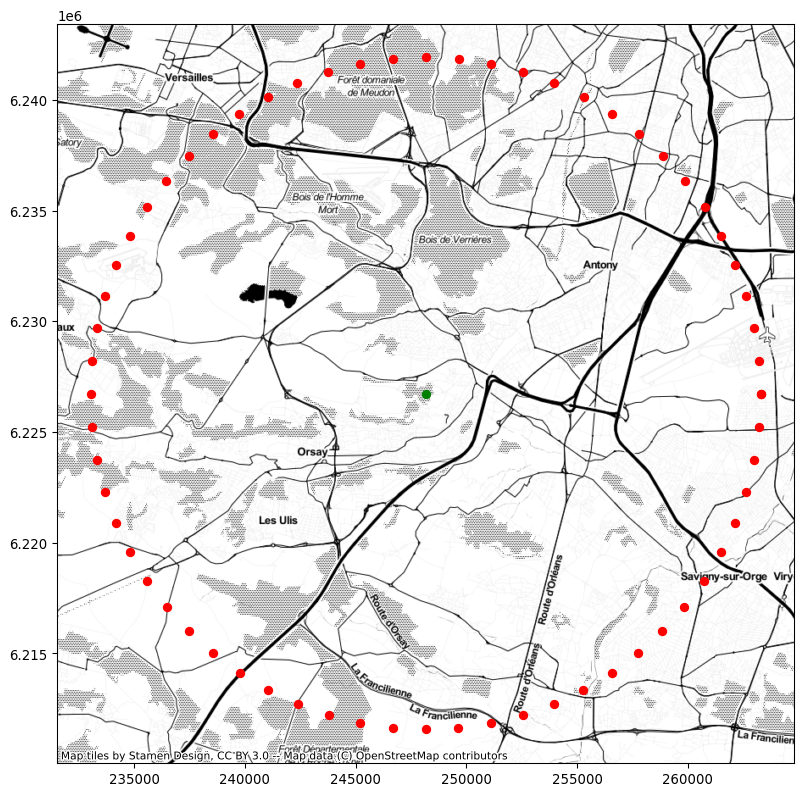

On a bien un cercle centré autour de Palaiseau:

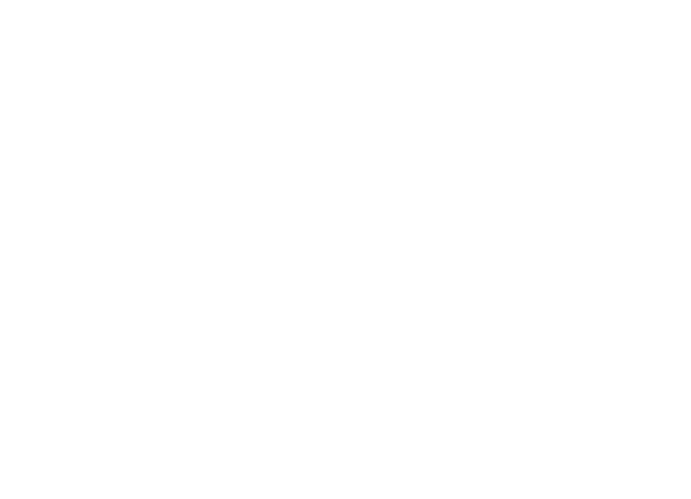

1.  *To be continued*: améliorer la constitutoin du cercle puis merge spatial

</div>

# Exercices supplémentaires

<div class="alert alert-success" role="alert">

**Exercice 2 : Retrouver des produits dans l’openfood facts :pizza:**

Voici une liste de code-barres:
`3274080005003,  5449000000996, 8002270014901, 3228857000906, 3017620421006, 8712100325953`

Utiliser l’[API d’openfoodfacts](https://world.openfoodfacts.org/data)
(l’API, pas depuis le CSV !)
pour retrouver les produits correspondant
et leurs caractéristiques nutritionnelles.

Le panier paraît-il équilibré ? :chocolate_bar:

Pour vous aidez, vous pouvez regarder une exemple de structure du json ici : https://world.openfoodfacts.org/api/v0/product/3274080005003.json en particulier la catégorie `nutriments`.

Récupérer l’URL d’une des images et l’afficher dans votre navigateur. Par exemple,
celle-ci:

![](https://images.openfoodfacts.org/images/products/544/900/000/0996/front_en.596.200.jpg)

</div>

## Exemple avec l’API de la Banque Mondiale

Avec l’API de la Banque mondiale, voici comme s’écrit une requête :

> http://api.worldbank.org/v2/countries?incomeLevel=LMC

1.  Le point d’entrée est l’URL <http://api.worldbank.org/v2><a name="cite_ref-3"></a>[<sup>\[3\]</sup>](#cite_note-3)
2.  Un filtre est appliqué sur les pays (`countries?`) afin de ne conserver
    que celles telles que `incomeLevel=LMC` (*“Lower middle income”*)

Cette API utilise un protocole HTTP qui est de moins en moins utilisé. Il
est recommandé de privilégier les protocoles HTTPS, plus sécurisés.

En cliquant sur le lien, le site renvoie des données en XML,
qui ressemblent pas mal à ce qu’on a vu plus tôt avec le scraping : une structure avec des balises qui s’ouvrent et qui se ferment.

Pour obtenir la même information en `Python`, il faut revenir aux fondamentaux : on va avoir besoin du module `requests`. Suivant les API, nous avons soit besoin de rien de plus si nous parvenons directement à obtenir un json, soit devoir utiliser un *parser* comme `BeautifulSoup` dans le cas contraire.

Avec l’API de la banque mondiale, on va utiliser le module `requests` et sa méthode `get` : on lui donne l’url de l’API qui nous intéresse, on lui demande d’en faire un json et le tour est *en apparence* joué.

In [42]:
import requests
req = requests.get('http://api.worldbank.org/v2/countries?incomeLevel=LMC')

Quand on regarde de plus près, on voit que les informations suivantes apparaissent :

-   Code du pays
-   Nom du pays
-   Région
-   Classification en termes de revenus
-   Les types de prêt pour ces pays
-   La capitale
-   Longitude
-   Latitude

Le format XML est fortement balisé, ce qui n’est pas très pratique.
En utilisant désormais un autre URL, on obtient un JSON, plus pratique pour travailler :

> http://api.worldbank.org/v2/countries?incomeLevel=LMC&format=json

In [43]:
import requests
import pandas as pd

req = requests.get('http://api.worldbank.org/v2/countries?incomeLevel=LMC&format=json')
wb = req.json()
wb = pd.json_normalize(wb[1])
wb.head(5)

,id,iso2Code,name,capitalCity,longitude,latitude,region.id,region.iso2code,region.value,adminregion.id,adminregion.iso2code,adminregion.value,incomeLevel.id,incomeLevel.iso2code,incomeLevel.value,lendingType.id,lendingType.iso2code,lendingType.value
0,AGO,AO,Angola,Luanda,13.242,-8.81155,SSF,ZG,Sub-Saharan Africa,SSA,ZF,Sub-Saharan Africa (excluding high income),LMC,XN,Lower middle income,IBD,XF,IBRD
1,BEN,BJ,Benin,Porto-Novo,2.6323,6.4779,SSF,ZG,Sub-Saharan Africa,SSA,ZF,Sub-Saharan Africa (excluding high income),LMC,XN,Lower middle income,IDX,XI,IDA
2,BGD,BD,Bangladesh,Dhaka,90.4113,23.7055,SAS,8S,South Asia,SAS,8S,South Asia,LMC,XN,Lower middle income,IDX,XI,IDA
3,BOL,BO,Bolivia,La Paz,-66.1936,-13.9908,LCN,ZJ,Latin America & Caribbean,LAC,XJ,Latin America & Caribbean (excluding high income),LMC,XN,Lower middle income,IBD,XF,IBRD
4,BTN,BT,Bhutan,Thimphu,89.6177,27.5768,SAS,8S,South Asia,SAS,8S,South Asia,LMC,XN,Lower middle income,IDX,XI,IDA


Cependant, si on regarde la dimension de l’objet obtenu, on obtient un
chiffre rond (50 lignes). Ceci est suspect et un petit tour dans la
documentation de l’API nous apprendrait que c’est le nombre maximal de
retour possible. Il faut donc faire attention à la documentation et
ajouter un paramètre `page=2` pour rattraper les derniers échos:

In [44]:
wb2 = pd.json_normalize(
    requests.get("http://api.worldbank.org/v2/countries?incomeLevel=LMC&format=json&page=2").json()[1]
    )
pd.concat([wb, wb2]).head(5)

,id,iso2Code,name,capitalCity,longitude,latitude,region.id,region.iso2code,region.value,adminregion.id,adminregion.iso2code,adminregion.value,incomeLevel.id,incomeLevel.iso2code,incomeLevel.value,lendingType.id,lendingType.iso2code,lendingType.value
0,AGO,AO,Angola,Luanda,13.242,-8.81155,SSF,ZG,Sub-Saharan Africa,SSA,ZF,Sub-Saharan Africa (excluding high income),LMC,XN,Lower middle income,IBD,XF,IBRD
1,BEN,BJ,Benin,Porto-Novo,2.6323,6.4779,SSF,ZG,Sub-Saharan Africa,SSA,ZF,Sub-Saharan Africa (excluding high income),LMC,XN,Lower middle income,IDX,XI,IDA
2,BGD,BD,Bangladesh,Dhaka,90.4113,23.7055,SAS,8S,South Asia,SAS,8S,South Asia,LMC,XN,Lower middle income,IDX,XI,IDA
3,BOL,BO,Bolivia,La Paz,-66.1936,-13.9908,LCN,ZJ,Latin America & Caribbean,LAC,XJ,Latin America & Caribbean (excluding high income),LMC,XN,Lower middle income,IBD,XF,IBRD
4,BTN,BT,Bhutan,Thimphu,89.6177,27.5768,SAS,8S,South Asia,SAS,8S,South Asia,LMC,XN,Lower middle income,IDX,XI,IDA


Si on regarde l’information présente dans le DataFrame, on voit qu’elle se
présente sous forme `lendingType.value`. C’est parce que `pandas` a
concaténé les différents niveaux de notre dictionnaire. Si on désire
s’en assurer, on peut regarder sur un exemple:

In [45]:
req.json()[1][0]['incomeLevel']['value'] == wb.loc[0, 'incomeLevel.value'] 

True